<a href="https://colab.research.google.com/github/fergogu27-ctrl/EDPII/blob/main/M%C3%A9todo_de_Galerkin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mètodo de Galerkin**

Este es un tipo de método de residuos pesados, donde las funciones de peso coinciden con las funciones de base $\beta_1$

In [1]:
import sympy as sp    #Calculo simbolico
import numpy as np    #Hace arreglo, nos ayuda a dar datos para la grafica

import matplotlib.pyplot as plt

Queremos resolver la ecuación
$$\frac{-\  d^2 u}{\ dx^2 } + u =  x$$
$$-u''+u-x=0$$

sujeta a las condiciones $$u(0)=u(1)=0$$

Analiticamente

In [2]:
x, a, b, c=sp.symbols('x a b c')
u = sp.Function('u')

Tenemos la siguiente ecuación $$-u''+u-x=0 \iff u''-u+x=0, \ \ \ u(0)=u(1)=0 $$

In [3]:
ode = sp.Eq(sp.diff(u(x),x, 2) - u(x) + x,0)     #Definimos la función, inidicamos que u es función de x, calcula la derivada 2 respecto de x(diff) , suma la misma función y por ultimo sumamos x
sp.dsolve(ode,u(x))


Eq(u(x), C1*exp(-x) + C2*exp(x) + x)

In [4]:
sol = sp.dsolve(ode, ics={u(0): 0, u(1): 0} )   #(ics)Es una estructura de diccionario (llave, valor ).  Introducimos los valores de la condición inicial

In [5]:
sol

Eq(u(x), x - E*exp(x)/(-1 + exp(2)) + E*exp(-x)/(-1 + exp(2)))

In [6]:
u_expr = sol.rhs      #Convertimos en un arreglo


In [7]:
u_num=sp.lambdify(x, u_expr, "numpy")

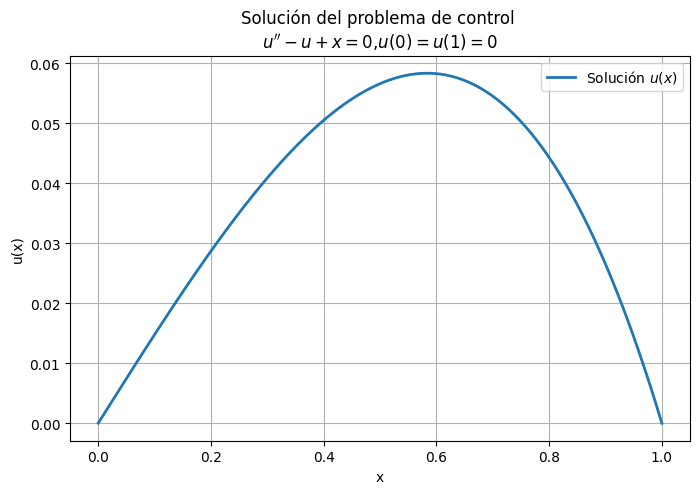

In [8]:
xx=np.linspace(0,1,100)
yy=u_num(xx)

plt.figure(figsize=(8, 5))
plt.plot(xx, yy,  label='Solución $u(x)$', linewidth=2)
plt.title('Solución del problema de control \n$u\'\'-u+x=0$,$u(0)=u(1)=0$')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.grid(True)
plt.show()


Ya calculamos la solución analítica (exacta) del problema ahora aplicando el método de Galerkin con base seno, la imagen nos indica utilizar
$$u_3(x) = \sum_{i=1}^{3} \alpha_i \sin(i\pi x)$$
Con estas funciones las condiciones $u_3(0)=u_3(1)=0$

In [9]:
u_2= a*sp.sin(sp.pi*x) + b*sp.sin(2*sp.pi*x) + c*sp.sin(3*sp.pi*x) #Se puede poner u_2, como definimos en clase
u_2

a*sin(pi*x) + b*sin(2*pi*x) + c*sin(3*pi*x)

Definimos el residuo (error) $$E=-u_3''(x)+u_3(x)-x$$


In [10]:
u_2_d_2 = sp.diff(u_2, x, 2)

E = -u_2_d_2 + u_2 - x
E

a*sin(pi*x) + b*sin(2*pi*x) + c*sin(3*pi*x) - x + pi**2*(a*sin(pi*x) + 4*b*sin(2*pi*x) + 9*c*sin(3*pi*x))

In [11]:
E.simplify()

a*sin(pi*x) + b*sin(2*pi*x) + c*sin(3*pi*x) - x + pi**2*(a*sin(pi*x) + 4*b*sin(2*pi*x) + 9*c*sin(3*pi*x))

Al pedir esta condición estamos pidiendo que sean ortogonales (es una funcion multiplicada por otra funcion)es un producto interno . Funciones ortogonales

Teniendo el error calculado aplicamos la integral para cada una de las ecuaciones.

$$\int_0^1 E(x)\sin(i\pi x)\,dx = 0, \quad i=1,2,3$$

In [12]:
I_1=sp.integrate(E*sp.sin(sp.pi*x), (x,0,1) )# Ecuaciones de Galerkin
I_1

a/2 + pi**2*a/2 - 1/pi

In [13]:
I_2=sp.integrate(E*sp.sin(2*sp.pi*x), (x,0,1) )# Ecuaciones de Galerkin
I_2

b/2 + 2*pi**2*b + 1/(2*pi)

In [14]:
I_3=sp.integrate(E*sp.sin(3*sp.pi*x), (x,0,1) )# Ecuaciones de Galerkin
I_3

c/2 + 9*pi**2*c/2 - 1/(3*pi)

Teniendo el resultado de las tres integrales. Resolvemos este sistema de ecuaciones para determinar los valores de a, b y c:

In [15]:
soleq=sp.solve([I_1,I_2,I_3],[a,b,c],simplify=True) #para igualar a cero Resolver el sistema lineal
soleq



{a: 2/(pi + pi**3), b: -1/(pi + 4*pi**3), c: 2/(3*pi + 27*pi**3)}

Por tanto , la solución numérica es:





In [16]:
u_approx=u_2.subs(soleq)
u_approx

2*sin(pi*x)/(pi + pi**3) - sin(2*pi*x)/(pi + 4*pi**3) + 2*sin(3*pi*x)/(3*pi + 27*pi**3)

In [17]:
u_approx.simplify()

2*sin(pi*x)/(pi + pi**3) - sin(2*pi*x)/(pi + 4*pi**3) + 2*sin(3*pi*x)/(3*pi + 27*pi**3)

Obtenemos la solución numérica

In [18]:
u_approx_fn = sp.lambdify(x, u_approx, "numpy")#convierta en un arreglo para hacer la grafica

Cada método que vamos viendo, va avanzado su aproximación de la solución analítica a la solución numérica y observamos que en el método de Galerkin la solucion y su aproximación son casi iguales pero el error es mucho menor a los anteriores métodos. Observemos la gráfica

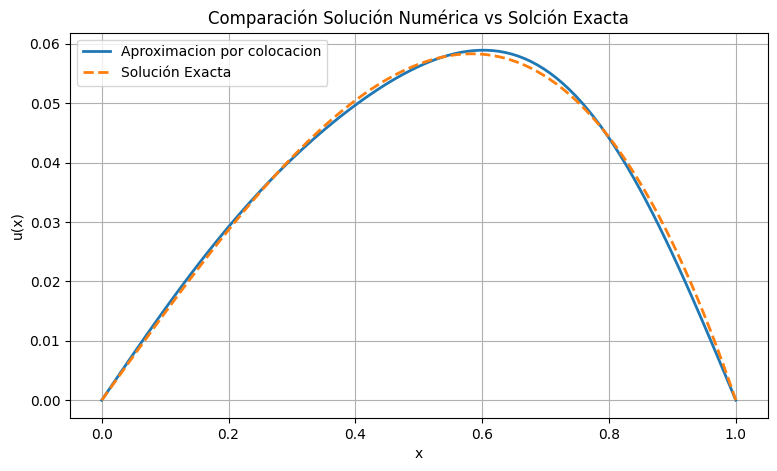

In [19]:
#Solucion analitica y numerica
xx = np.linspace(0,1,100)


plt.figure(figsize=(9, 5))
plt.plot(xx, u_approx_fn(xx), label='Aproximacion por colocacion', linewidth=2)
plt.plot(xx, yy, '--', label=f'Solución Exacta',linewidth=2)
plt.title('Comparación Solución Numérica vs Solción Exacta')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.grid(True)
plt.show()


Calcule el error de la aproximación numérica.

In [20]:
import pandas as pd

# Elegimos puntos donde queremos ver el error
puntos = np.linspace(0, 1, 11)  # 0, 0.1, 0.2, ..., 1

# Evaluamos exacta y aproximada
tabla_exacta = u_num(puntos)
tabla_aprox  = u_approx_fn(puntos)

# Error
error = tabla_exacta - tabla_aprox
error_abs = np.abs(error)

# Construir tabla
tabla = pd.DataFrame({
    "x": puntos,
    "u_exacta": tabla_exacta,
    "u_aprox": tabla_aprox,
    "error": error,
    "error_abs": error_abs
})

print(tabla)

      x      u_exacta       u_aprox         error     error_abs
0   0.0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
1   0.1  1.476630e-02  1.538782e-02 -6.215244e-04  6.215244e-04
2   0.2  2.867955e-02  2.919385e-02 -5.143010e-04  5.143010e-04
3   0.3  4.087816e-02  4.063437e-02  2.437944e-04  2.437944e-04
4   0.4  5.048340e-02  4.969150e-02  7.919045e-04  7.919045e-04
5   0.5  5.659056e-02  5.620640e-02  3.841569e-04  3.841569e-04
6   0.6  5.825993e-02  5.893582e-02 -6.758963e-04  6.758963e-04
7   0.7  5.450738e-02  5.559200e-02 -1.084626e-03  1.084626e-03
8   0.8  4.429452e-02  4.415148e-02  1.430387e-04  1.430387e-04
9   0.9  2.651831e-02  2.463215e-02  1.886162e-03  1.886162e-03
10  1.0  1.387779e-16  9.966594e-18  1.288113e-16  1.288113e-16


[0.00000000e+00 7.83506629e-05 1.55681811e-04 2.30986234e-04
 3.03281193e-04 3.71620319e-04 4.35105105e-04 4.92895873e-04
 5.44222080e-04 5.88391863e-04 6.24800700e-04 6.52939102e-04
 6.72399231e-04 6.82880382e-04 6.84193255e-04 6.76262952e-04
 6.59130688e-04 6.32954152e-04 5.98006532e-04 5.54674194e-04
 5.03453025e-04 4.44943479e-04 3.79844366e-04 3.08945427e-04
 2.33118789e-04 1.53309356e-04 7.05242518e-05 1.41786030e-05
 9.97026435e-05 1.84925435e-04 2.68711932e-04 3.49928085e-04
 4.27454650e-04 5.00201058e-04 5.67119192e-04 6.27216920e-04
 6.79571235e-04 7.23340858e-04 7.57778142e-04 7.82240165e-04
 7.96198840e-04 7.99249952e-04 7.91120972e-04 7.71677562e-04
 7.40928653e-04 6.99030028e-04 6.46286323e-04 5.83151393e-04
 5.10226995e-04 4.28259761e-04 3.38136439e-04 2.40877416e-04
 1.37628523e-04 2.96511664e-05 8.16891687e-05 1.94935980e-04
 3.08556297e-04 4.20956624e-04 5.30500163e-04 6.35525210e-04
 7.34364578e-04 8.25365913e-04 9.06912747e-04 9.77446126e-04
 1.03548664e-03 1.079656

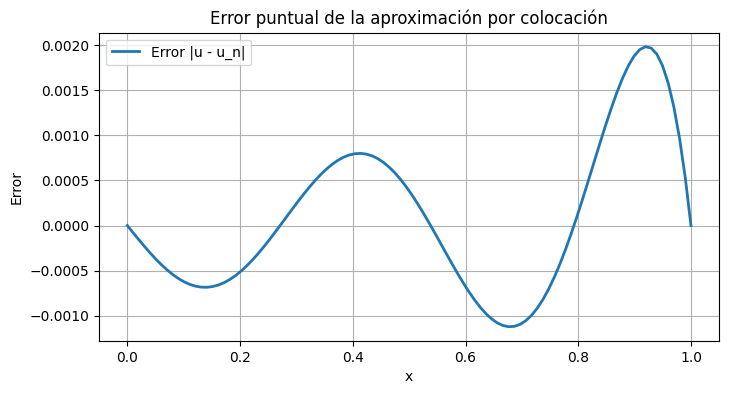

In [21]:
# Error aprox
error = u_num(xx) - u_approx_fn(xx)
error_abs = np.abs(error)
print(error_abs)


# Gráfica del error aprox
plt.figure(figsize=(8,4))
plt.plot(xx, error, label="Error |u - u_n|", linewidth=2)
plt.title("Error puntual de la aproximación por colocación")
plt.xlabel("x")
plt.ylabel("Error")
plt.grid(True)
plt.legend()
plt.show()